In [1]:
with open('female-detainee-cases.html', encoding='utf-8') as f:
    html = f.read()


In [3]:
html

'\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">\n\n<html>\n<head>\n\t\n <title>Female detainees\' records</title>\n\n</head>\n\n<body>\n\n<a href="femalerecords.html">Return to Frederick Bee History Project</a><br><br> \n\nfemale detainees whose cases were adjudicated at the US District Court for the Northern District of California, San Francisco from 1882 to 1892.<br><br>\n\n<a href="2657.html">Case 2657 Moy Chin See his wife</a><br><br>\n<a href="2917.html">Case 2917 Lee Kin Sai alias Lee Wah Chung</a><br><br>\n<a href="2950.html">Case 2950 Tie Yimm a woman</a><br><br>\n<a href="3068.html">Case 3068 Lin Kum daughter, Wye See mother</a><br><br>\n<a href="3100.html">Case 3100 Tarm How Yen wife</a><br><br>\n<a href="3308.html">Case 3308 Yung Ah Chung woman</a><br><br>\n<a href="3549.html">Case 3549 Mrs. Fong Ah Chung</a><br><br>\n<a href="3644.html">Case 3644 Mrs. Ching Din</a><br><br>\n<a href="3745.html">Case 3745 Mrs. Lee nee Chun Ah On</a><br><br>\n<a href="3763.ht

In [5]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')


In [7]:
soup


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">

<html>
<head>
<title>Female detainees' records</title>
</head>
<body>
<a href="femalerecords.html">Return to Frederick Bee History Project</a><br/><br/> 

female detainees whose cases were adjudicated at the US District Court for the Northern District of California, San Francisco from 1882 to 1892.<br/><br/>
<a href="2657.html">Case 2657 Moy Chin See his wife</a><br/><br/>
<a href="2917.html">Case 2917 Lee Kin Sai alias Lee Wah Chung</a><br/><br/>
<a href="2950.html">Case 2950 Tie Yimm a woman</a><br/><br/>
<a href="3068.html">Case 3068 Lin Kum daughter, Wye See mother</a><br/><br/>
<a href="3100.html">Case 3100 Tarm How Yen wife</a><br/><br/>
<a href="3308.html">Case 3308 Yung Ah Chung woman</a><br/><br/>
<a href="3549.html">Case 3549 Mrs. Fong Ah Chung</a><br/><br/>
<a href="3644.html">Case 3644 Mrs. Ching Din</a><br/><br/>
<a href="3745.html">Case 3745 Mrs. Lee nee Chun Ah On</a><br/><br/>
<a href="3763.html">Case 3763

In [9]:
anchors = soup.find_all('a', string=lambda t: t and t.startswith('Case '))


In [11]:
anchors

[<a href="2657.html">Case 2657 Moy Chin See his wife</a>,
 <a href="2917.html">Case 2917 Lee Kin Sai alias Lee Wah Chung</a>,
 <a href="2950.html">Case 2950 Tie Yimm a woman</a>,
 <a href="3068.html">Case 3068 Lin Kum daughter, Wye See mother</a>,
 <a href="3100.html">Case 3100 Tarm How Yen wife</a>,
 <a href="3308.html">Case 3308 Yung Ah Chung woman</a>,
 <a href="3549.html">Case 3549 Mrs. Fong Ah Chung</a>,
 <a href="3644.html">Case 3644 Mrs. Ching Din</a>,
 <a href="3745.html">Case 3745 Mrs. Lee nee Chun Ah On</a>,
 <a href="3763.html">Case 3763 Mrs. Leong nee Lee Ah Fung</a>,
 <a href="3813.html">Case 3813 Mrs. Chun nee Lee Ah You</a>,
 <a href="3839.html">Case 3839 Mrs. Ah Foo nee Jeong Que</a>,
 <a href="4210.html">Case 4210 Mrs. Chuey Gun</a>,
 <a href="4236.html">Case 4236 Mrs. Kwong Kan</a>,
 <a href="4725.html">Case 4725 Lee Doong Hee</a>,
 <a href="4930.html">Case 4930 Tong Look Gun </a>,
 <a href="4961.html">Case 4961 Chun Ah Soo </a>,
 <a href="4962.html">Case 4962 Chin Ho

In [13]:
import re
records = []
for a in anchors:
    href = a['href']                  # e.g. "2657.html" or "youngchoyling.html"
    text = a.get_text(strip=True)     # e.g. "Case 2657 Moy Chin See his wife"
    m = re.match(r'Case\s+(\d+)\s+(.*)', text)
    if m:
        case_num, name = m.groups()
        records.append({
            'case_number': case_num,
            'name_raw':     name,
            'link':         href
        })
    else:
        # record entries that didn’t match for manual review
        records.append({
            'case_number': None,
            'name_raw':     text,
            'link':         href,
            'note':         'UNPARSED'
        })


In [15]:
records

[{'case_number': '2657',
  'name_raw': 'Moy Chin See his wife',
  'link': '2657.html'},
 {'case_number': '2917',
  'name_raw': 'Lee Kin Sai alias Lee Wah Chung',
  'link': '2917.html'},
 {'case_number': '2950', 'name_raw': 'Tie Yimm a woman', 'link': '2950.html'},
 {'case_number': '3068',
  'name_raw': 'Lin Kum daughter, Wye See mother',
  'link': '3068.html'},
 {'case_number': '3100', 'name_raw': 'Tarm How Yen wife', 'link': '3100.html'},
 {'case_number': '3308',
  'name_raw': 'Yung Ah Chung woman',
  'link': '3308.html'},
 {'case_number': '3549',
  'name_raw': 'Mrs. Fong Ah Chung',
  'link': '3549.html'},
 {'case_number': '3644', 'name_raw': 'Mrs. Ching Din', 'link': '3644.html'},
 {'case_number': '3745',
  'name_raw': 'Mrs. Lee nee Chun Ah On',
  'link': '3745.html'},
 {'case_number': '3763',
  'name_raw': 'Mrs. Leong nee Lee Ah Fung',
  'link': '3763.html'},
 {'case_number': '3813',
  'name_raw': 'Mrs. Chun nee Lee Ah You',
  'link': '3813.html'},
 {'case_number': '3839',
  'name_r

In [17]:
import pandas as pd
df = pd.DataFrame(records)


In [19]:
df

,case_number,name_raw,link
0,2657,Moy Chin See his wife,2657.html
1,2917,Lee Kin Sai alias Lee Wah Chung,2917.html
2,2950,Tie Yimm a woman,2950.html
3,3068,"Lin Kum daughter, Wye See mother",3068.html
4,3100,Tarm How Yen wife,3100.html
...,...,...,...
133,10116,Chin Chon Loy,10116.html
134,10144,Cha Sing Kwai,10144.html
135,10145,Cha Tai Kim,10145.html
136,10175,Young Choy Ling,youngchoyling.html


In [21]:
df.to_csv('female_detainee_cases_1882_1892.csv', index=False, encoding='utf-8')


In [35]:

# Load the cleaned dataset
df = pd.read_csv('female_detainee_cases_1882_1892.csv')

# Select 25 random rows
sample_df = df.sample(n=25)

# Save the sample to a new CSV file
sample_df.to_csv('sample_habeas_corpus_cases.csv', index=False)



Total number of records: 138
Number of unique case numbers: 131
Number of unique cases after removing duplicates: 131

Case number range:
Earliest case number: 2657
Latest case number: 10209

Estimated cases by year:
1882: 6 cases
1883: 6 cases
1884: 3 cases
1885: 82 cases
1890: 20 cases
1891: 13 cases
1892: 1 cases

Year with most detainees: 1885 with 82 cases

Analyzing naming patterns:
name_type
Name only              117
Married (Mrs.)           8
Identified as wife       2
Identified as woman      2
Alias                    1
Family relationship      1
Name: count, dtype: int64

Most common surnames:
Wong: 17
Lee: 10
Leong: 9
Mrs: 8
Chun: 6
Chin: 5
Low: 4
Ng: 4
Quock: 3
Ho: 3

Potential related case groups (consecutive or near-consecutive numbers):
Group 1: [4961, 4962, 4963, 4966, 4967, 4969, 4970, 4975, 4976, 4977, 4978, 4979, 4980, 4981, 4982, 4983, 4984, 4985, 4986, 4987, 4988, 4989, 4990, 4991, 4992, 4993, 4994]
Group 2: [5055, 5056, 5057, 5058, 5059, 5060, 5061, 5062, 5063, 

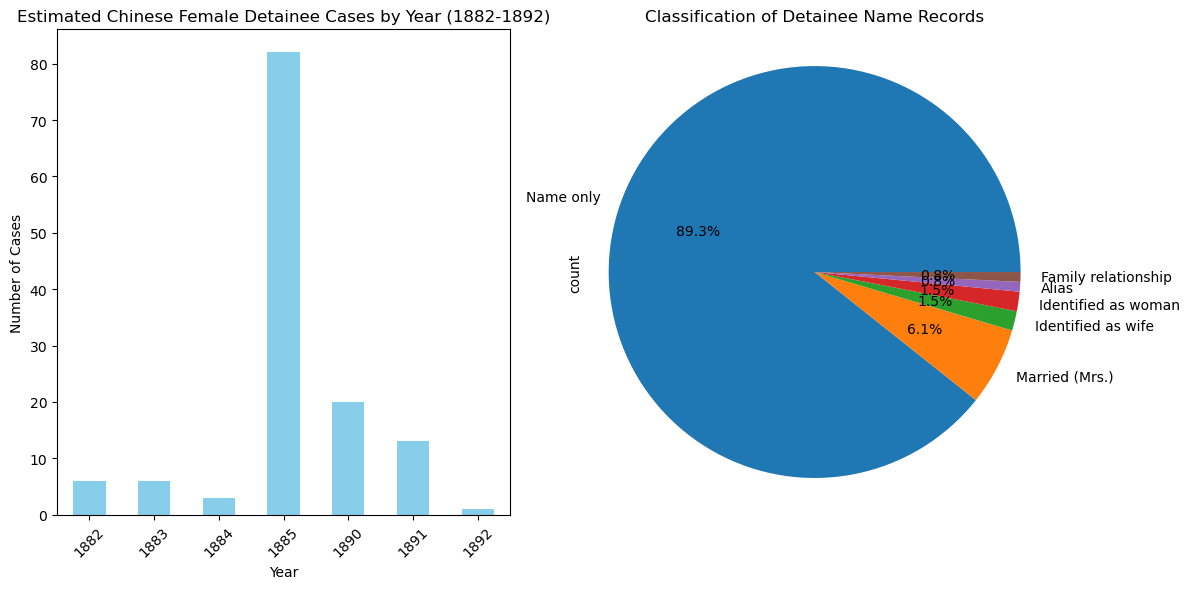

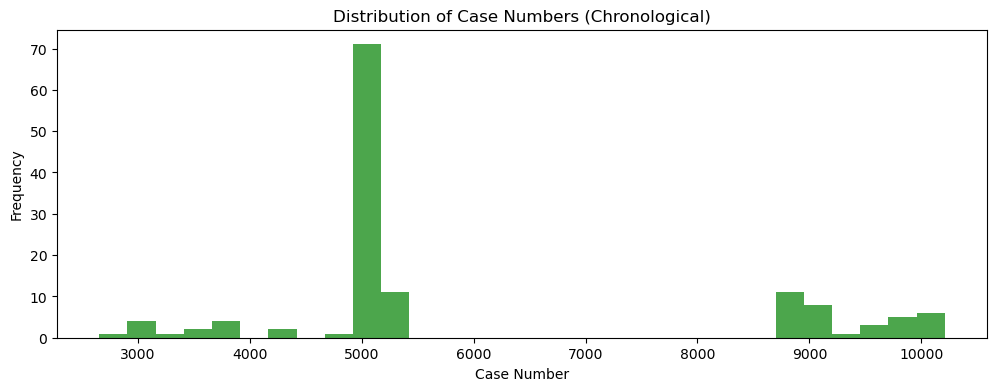

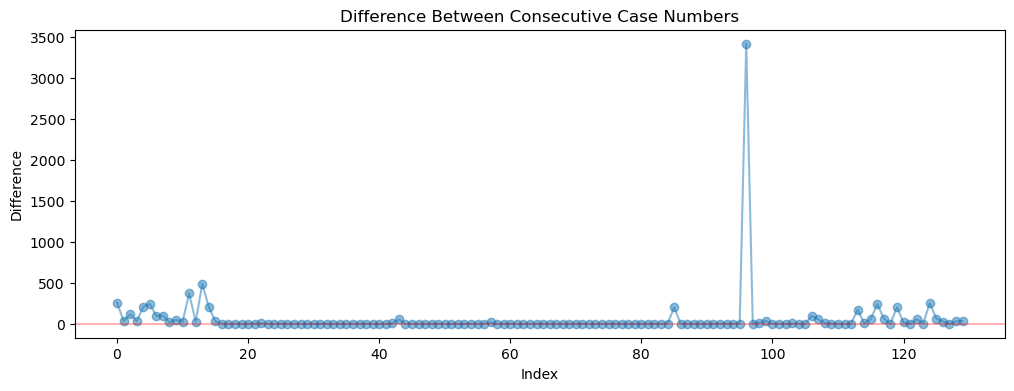

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from collections import Counter

# Load the data
data = pd.read_csv('female_detainee_cases_1882_1892.csv')

# Display basic information about the dataset
print(f"Total number of records: {len(data)}")
print(f"Number of unique case numbers: {data['case_number'].nunique()}")

# Remove duplicate entries (keeping first occurrence)
# Some case numbers appear multiple times for appeals or split testimonies
data_unique = data.drop_duplicates(subset=['case_number'], keep='first')
print(f"Number of unique cases after removing duplicates: {len(data_unique)}")

# Sort by case number to see chronological order
data_sorted = data_unique.sort_values('case_number')
print("\nCase number range:")
print(f"Earliest case number: {data_sorted['case_number'].min()}")
print(f"Latest case number: {data_sorted['case_number'].max()}")

# Estimate year based on case number
# Since we don't have explicit year information, we'll make an estimation
# We know the range is 1882-1892 (11 years) and we have case numbers from around 2657 to 10209
# Let's assign years proportionally based on case number

min_case = data_sorted['case_number'].min()
max_case = data_sorted['case_number'].max()
case_range = max_case - min_case

# Function to estimate year
def estimate_year(case_num):
    # Normalize the case number to a value between 0 and 1
    normalized = (case_num - min_case) / case_range
    # Map to years between 1882 and 1892
    estimated_year = 1882 + normalized * 10
    return int(estimated_year)

# Add estimated year column
data_sorted['estimated_year'] = data_sorted['case_number'].apply(estimate_year)

# Count cases by estimated year
yearly_counts = data_sorted['estimated_year'].value_counts().sort_index()
print("\nEstimated cases by year:")
for year, count in yearly_counts.items():
    print(f"{year}: {count} cases")

# Find year with most detainees
max_year = yearly_counts.idxmax()
max_count = yearly_counts.max()
print(f"\nYear with most detainees: {max_year} with {max_count} cases")

# Name pattern analysis
print("\nAnalyzing naming patterns:")

# Function to classify name types
def classify_name(name):
    if 'Mrs.' in name:
        return 'Married (Mrs.)'
    elif ' nee ' in name:
        return 'Maiden name specified'
    elif 'alias' in name:
        return 'Alias'
    elif 'mother' in name or 'daughter' in name:
        return 'Family relationship'
    elif 'wife' in name:
        return 'Identified as wife'
    elif 'woman' in name:
        return 'Identified as woman'
    else:
        return 'Name only'

data_sorted['name_type'] = data_sorted['name_raw'].apply(classify_name)
name_type_counts = data_sorted['name_type'].value_counts()
print(name_type_counts)

# Find common name patterns
surnames = []
for name in data_sorted['name_raw']:
    # Extract surnames (usually first word if Chinese name pattern)
    match = re.search(r'^(\w+)', name)
    if match:
        surnames.append(match.group(1))

print("\nMost common surnames:")
surname_counter = Counter(surnames)
for surname, count in surname_counter.most_common(10):
    print(f"{surname}: {count}")

# Plotting
plt.figure(figsize=(12, 6))

# Plot 1: Cases by year
plt.subplot(1, 2, 1)
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('Estimated Chinese Female Detainee Cases by Year (1882-1892)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)

# Plot 2: Name classifications
plt.subplot(1, 2, 2)
name_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Classification of Detainee Name Records')
plt.axis('equal')

plt.tight_layout()

# If you want to see the distribution of cases over time
plt.figure(figsize=(12, 4))
plt.hist(data_sorted['case_number'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Case Numbers (Chronological)')
plt.xlabel('Case Number')
plt.ylabel('Frequency')

# See if there are patterns in case grouping
case_diffs = np.diff(sorted(data_sorted['case_number']))
plt.figure(figsize=(12, 4))
plt.plot(case_diffs, 'o-', alpha=0.5)
plt.title('Difference Between Consecutive Case Numbers')
plt.xlabel('Index')
plt.ylabel('Difference')
plt.axhline(y=1, color='r', linestyle='-', alpha=0.3)

# Additional analysis: Case clustering
# Cases that appear in consecutive numbers might be related or part of the same incident
consecutive_groups = []
current_group = [data_sorted['case_number'].iloc[0]]

for i in range(1, len(data_sorted)):
    current = data_sorted['case_number'].iloc[i]
    prev = data_sorted['case_number'].iloc[i-1]
    
    if current - prev <= 5:  # Consider cases within 5 numbers of each other as potentially related
        current_group.append(current)
    else:
        if len(current_group) > 1:
            consecutive_groups.append(current_group)
        current_group = [current]

if len(current_group) > 1:
    consecutive_groups.append(current_group)

print("\nPotential related case groups (consecutive or near-consecutive numbers):")
for i, group in enumerate(consecutive_groups[:10], 1):  # Show first 10 groups
    print(f"Group {i}: {group}")
print(f"Total potential related groups: {len(consecutive_groups)}")

# Print dataset with estimated years for reference
print("\nSample of cases with estimated years:")
print(data_sorted[['case_number', 'name_raw', 'estimated_year']].head(10))

# Display the full dataframe for further manual inspection
print("\nFull dataset with analysis columns:")
print(data_sorted[['case_number', 'name_raw', 'name_type', 'estimated_year']].sort_values('estimated_year'))


when we started this in class the other day, the code chatgpt gave me was very interpretable and I could follow it pretty well. When I resrtarted the chat on my own, it gave me a much more segmented and confusing set of instructions. the output was slightly more simplified with only three columns instead of the five i got originally which included a flag for mismatches between the filenames and generated names. the second time it also included case 5062 all five times that it appears on the html, which i think was pretty good. it also offered a more detailed explanation of the problems that might have occurred and things for me to look out for on revision. i tried to have it remove the tags like "a woman" or "his wife" but couldn't quite get it to work right. 
when i moved to claude and asked it to examine the sample of 25 women, it did some really incredible extrapolating and assumed that the case numbers increased in order according to the year they were created. using this assumption it created a serious of graphs and charts examining the trends by "timeline". it also broke down the most common surnames and counted the amount of women identified as women or wives along with their name. 
i ran into a few snags when trying to get the ai to edit its own code, which i suppose is to be expeted when it can't actually run the code itself to see what happens. this excercise strengthened my belief that i should know as much about basic coding command language as i can before trying to use "vibe coding" to its full advantage. it gets away from my understanding level much too quickly and i am at a loss when it comes to debugging. however, i still think the results were pretty astounding, especially claude's level of contextual inference and figure creation.